# COVID-19 Evolution Germany
2020-03-22

In [15]:
# define the error function for fitting
def fit_func(x,a,b):
    import scipy
    fit = 80E6*(scipy.special.erf(a*(x-b)) + 1)*0.5
    return fit

In [16]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import ticker
from matplotlib.dates import (DateFormatter, drange)
import seaborn as sns
import datetime

In [24]:
# data for Germany from Johns Hopkins University
# https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6
ydata = np.array([
    0,0,0,0,0,1,4,4,4,5,8,10,12,12,12,12,13,13,14,14,16,16,16,16,16,16,16,16,16,16,16,16,16,16,17,27,46,\
    48,79,130,159,196,262,482,670,799,1040,1176,1457,1908,2078,3675,4585,5795,7272,9257,12327,15320,19848,
    22364,24873,29056,32986, 37323,43938])
# to Mar 26
xdata = np.arange(1,len(ydata)+1)
date1 = datetime.date(2020, 1, 22)
date2 = datetime.date(2020, 1, 22) + datetime.timedelta(days=len(ydata))
delta = datetime.timedelta(days=1)
dates = drange(date1, date2, delta)

In [18]:
# fit the data to the error function
from scipy.optimize import curve_fit
popt, pcov = curve_fit(fit_func, xdata, ydata, p0=[0.04, 120])
yfit = fit_func(xdata, popt[0], popt[1])

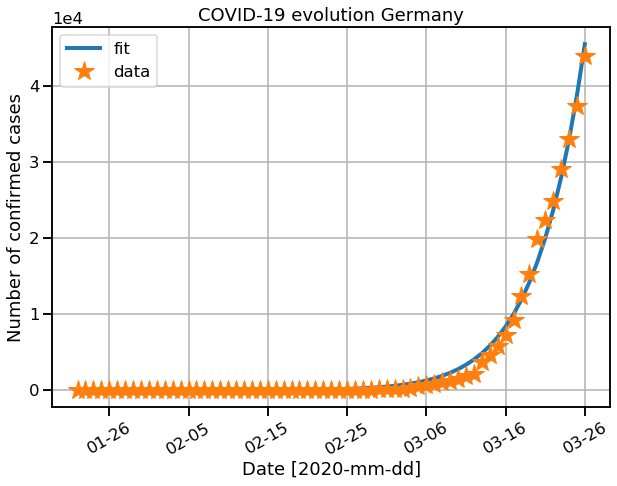

In [19]:
# plot the data and the fitted function
sns.set_context('talk')
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(dates, yfit, '-', linewidth=4, label="fit")
ax.plot(dates, ydata, '*', linewidth=4, label="data", markersize=20)
ax.set_xlabel(r"Date [2020-mm-dd]")
ax.set_ylabel(r"Number of confirmed cases")
ax.set_title(r"COVID-19 evolution Germany")
ax.grid(True)
#ax.tick_params(labelsize=14)
ax.xaxis.set_major_formatter(DateFormatter('%m-%d'))
ax.xaxis.set_tick_params(rotation=30)
plt.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
plt.legend()
plt.show()
#fig.savefig('c1.png')

In [20]:
# extrapolate to the coming months
x_ex = np.arange(1, 150)
y_ex = fit_func(x_ex, popt[0], popt[1])
date1 = datetime.date(2020, 1, 22)
date2 = datetime.date(2020, 1, 22) + datetime.timedelta(days=len(x_ex))
delta = datetime.timedelta(days=1)
dates_ex = drange(date1, date2, delta)

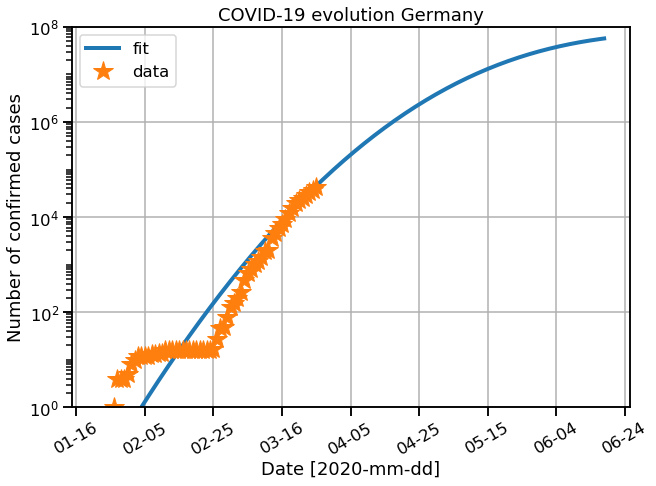

In [21]:
# plot the data and the extra-polation
fig, ax = plt.subplots(figsize=(10, 7))
ax.semilogy(dates_ex, y_ex, '-', linewidth=4, label="fit")
ax.semilogy(dates, ydata, '*', linewidth=4, label="data", markersize=20)
ax.set_xlabel(r"Date [2020-mm-dd]") # , fontsize=14)
ax.set_ylabel(r"Number of confirmed cases") # , fontsize=14)
ax.set_title(r"COVID-19 evolution Germany") # , fontsize=22)
ax.grid(True)
ax.set_ylim(1, 100E6)
ax.xaxis.set_major_formatter(DateFormatter('%m-%d'))
ax.xaxis.set_tick_params(rotation=30)# , labelsize=10)
locmin = ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),numticks=12)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(ticker.NullFormatter())
plt.legend()
plt.show()
#fig.savefig('c2.png')

In [22]:
# calculate the probability to have at least one infection in your company
people_germany = 80E6
people_company = 300
name_company = "ESO"

array_prob_company = np.array([0])
for day in np.arange(0,len(x_ex)-1):
    number_infections = y_ex[day]
    prob_company = 1 - np.exp(-people_company*(number_infections/people_germany))
    array_prob_company = np.append(array_prob_company, prob_company)

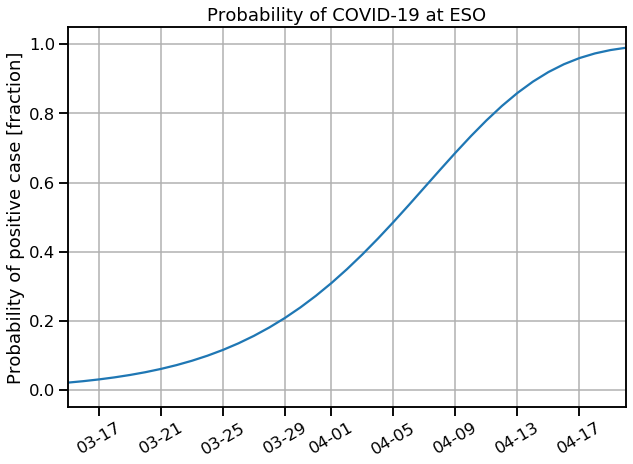

In [23]:
# plot the probability to have at least one infection in your company
sns.set_context('talk')
fig, ax = plt.subplots(figsize=(10, 7))
plt.plot_date(dates_ex, array_prob_company, '-')
ax.xaxis.set_major_formatter(DateFormatter('%m-%d'))
ax.xaxis.set_tick_params(rotation=30)# , labelsize=10)
ax.set_ylabel(r"Probability of positive case [fraction]")
ax.set_title(r"Probability of COVID-19 at {0}".format(name_company))
ax.grid(True)
ax.set_xlim(datetime.date(2020, 3, 15), datetime.date(2020, 4, 20))
#ax.tick_params(labelsize=14)
# plt.legend(fontsize=14)
plt.savefig('prob_' + name_company + '.png')
plt.show()